In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_oct = pd.read_csv("matchs_octobre.csv",index_col = 0)
for col in df_oct.columns[:-1]:
    df_oct[col] = df_oct[col].apply(lambda x: eval(x))
df_nov = pd.read_csv("matchs_novembre.csv",index_col = 0)
for col in df_nov.columns[:-1]:
    df_nov[col] = df_nov[col].apply(lambda x: eval(x))

In [3]:
champ_dict = {
  "895": "Nilah",
  "888": "Renata",
  "200": "Belveth",
  "266": "Aatrox",
  "103": "Ahri",
  "84": "Akali",
  "166": "Akshan",
  "12": "Alistar",
  "32": "Amumu",
  "34": "Anivia",
  "1": "Annie",
  "523": "Aphelios",
  "22": "Ashe",
  "136": "AurelionSol",
  "268": "Azir",
  "432": "Bard",
  "53": "Blitzcrank",
  "63": "Brand",
  "201": "Braum",
  "51": "Caitlyn",
  "164": "Camille",
  "69": "Cassiopeia",
  "31": "Chogath",
  "42": "Corki",
  "122": "Darius",
  "131": "Diana",
  "119": "Draven",
  "36": "DrMundo",
  "245": "Ekko",
  "60": "Elise",
  "28": "Evelynn",
  "81": "Ezreal",
  "9": "FiddleSticks",
  "114": "Fiora",
  "105": "Fizz",
  "3": "Galio",
  "41": "Gangplank",
  "86": "Garen",
  "150": "Gnar",
  "79": "Gragas",
  "104": "Graves",
  "887": "Gwen",
  "120": "Hecarim",
  "74": "Heimerdinger",
  "420": "Illaoi",
  "39": "Irelia",
  "427": "Ivern",
  "40": "Janna",
  "59": "JarvanIV",
  "24": "Jax",
  "126": "Jayce",
  "202": "Jhin",
  "222": "Jinx",
  "145": "Kaisa",
  "429": "Kalista",
  "43": "Karma",
  "30": "Karthus",
  "38": "Kassadin",
  "55": "Katarina",
  "10": "Kayle",
  "141": "Kayn",
  "85": "Kennen",
  "121": "Khazix",
  "203": "Kindred",
  "240": "Kled",
  "96": "KogMaw",
  "897": "KSante",
  "7": "Leblanc",
  "64": "LeeSin",
  "89": "Leona",
  "876": "Lillia",
  "127": "Lissandra",
  "236": "Lucian",
  "117": "Lulu",
  "99": "Lux",
  "54": "Malphite",
  "90": "Malzahar",
  "57": "Maokai",
  "11": "MasterYi",
  "21": "MissFortune",
  "62": "MonkeyKing",
  "82": "Mordekaiser",
  "25": "Morgana",
  "267": "Nami",
  "75": "Nasus",
  "111": "Nautilus",
  "518": "Neeko",
  "76": "Nidalee",
  "56": "Nocturne",
  "20": "Nunu",
  "2": "Olaf",
  "61": "Orianna",
  "516": "Ornn",
  "80": "Pantheon",
  "78": "Poppy",
  "555": "Pyke",
  "246": "Qiyana",
  "133": "Quinn",
  "497": "Rakan",
  "33": "Rammus",
  "421": "RekSai",
  "526": "Rell",
  "58": "Renekton",
  "107": "Rengar",
  "92": "Riven",
  "68": "Rumble",
  "13": "Ryze",
  "360": "Samira",
  "113": "Sejuani",
  "235": "Senna",
  "147": "Seraphine",
  "875": "Sett",
  "35": "Shaco",
  "98": "Shen",
  "102": "Shyvana",
  "27": "Singed",
  "14": "Sion",
  "15": "Sivir",
  "72": "Skarner",
  "37": "Sona",
  "16": "Soraka",
  "50": "Swain",
  "517": "Sylas",
  "134": "Syndra",
  "223": "TahmKench",
  "163": "Taliyah",
  "91": "Talon",
  "44": "Taric",
  "17": "Teemo",
  "412": "Thresh",
  "18": "Tristana",
  "48": "Trundle",
  "23": "Tryndamere",
  "4": "TwistedFate",
  "29": "Twitch",
  "77": "Udyr",
  "6": "Urgot",
  "110": "Varus",
  "67": "Vayne",
  "45": "Veigar",
  "161": "Velkoz",
  "711": "Vex",
  "254": "Vi",
  "234": "Viego",
  "112": "Viktor",
  "8": "Vladimir",
  "106": "Volibear",
  "19": "Warwick",
  "498": "Xayah",
  "101": "Xerath",
  "5": "XinZhao",
  "157": "Yasuo",
  "777": "Yone",
  "83": "Yorick",
  "350": "Yuumi",
  "154": "Zac",
  "238": "Zed",
  "115": "Ziggs",
  "26": "Zilean",
  "142": "Zoe",
  "143": "Zyra",
  "221": "Zeri"
}

champ_list = []
for i in champ_dict.items():
    champ_list.append(i[1])

### Quels sont les champions les plus joués au Top ?

In [4]:
#On compte combien de fois on retrouve chaque champion à chaque rôle pour les 2 mois
compteur = np.zeros([10,len(champ_list)])
for i in range(10) :
    for j in df_oct[df_oct.columns[i]] :      
        compteur[i][champ_list.index(j[1])] += 1

for i in range(10) :
    for j in df_nov[df_nov.columns[i]] :      
        compteur[i][champ_list.index(j[1])] += 1

#On note les 10 champions les plus joués au Top
champ_top = compteur[0] + compteur[5]
lst = pd.Series(champ_top)
most_played = lst.nlargest(10)
BT_champ = [champ_list[i] for i in most_played.index]

#On met ça sous la forme d'un DataFrame
df_bt = pd.DataFrame(most_played*100 / sum(compteur[0]))
df_bt["Champion"] = BT_champ
df_bt = df_bt.rename(columns = {0 : "Taux de présence"})

#Quels sont les champions les plus joués?
pd.DataFrame({"Champion" : BT_champ, "Nombre de parties" : most_played}).set_index("Champion")

,Nombre de parties
Champion,
Aatrox,922.0
Ornn,772.0
Fiora,766.0
Darius,732.0
Jax,686.0
Camille,629.0
Shen,621.0
Riven,525.0
Garen,497.0


<AxesSubplot:xlabel='Taux de présence', ylabel='Champion'>

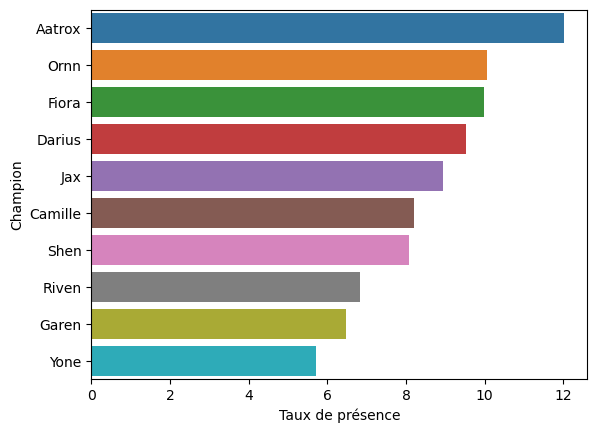

In [5]:
sns.barplot(data = df_bt, x = "Taux de présence", y = "Champion", orient = "h")

### Quels sont les counter de Aatrox ?

In [17]:
BAa_Opponent = []
BAa_Outcome = []
RAa_Opponent = []
RAa_Outcome = []

#On regarde contre qui est tombé Aatrox et si il a gagné en octobre, puis en novembre
for i in range(df_oct.shape[0]) :
    if df_oct.iloc[i][0][1] == "Aatrox" :
        BAa_Opponent.append(df_oct.iloc[i][5][1])
        BAa_Outcome.append(df_oct.iloc[i][10])
    if df_oct.iloc[i][5][1] == "Aatrox" :
        RAa_Opponent.append(df_oct.iloc[i][0][1])
        RAa_Outcome.append(df_oct.iloc[i][10])

for i in range(df_nov.shape[0]) :
    if df_nov.iloc[i][0][1] == "Aatrox" :
        BAa_Opponent.append(df_nov.iloc[i][5][1])
        BAa_Outcome.append(df_nov.iloc[i][10])
    if df_nov.iloc[i][5][1] == "Aatrox" :
        RAa_Opponent.append(df_nov.iloc[i][0][1])
        RAa_Outcome.append(df_nov.iloc[i][10])


#On compte combien de fois Aatrox est tombé contre quel champion
compt_aa = np.zeros(len(champ_list))
compt_win = np.zeros(len(champ_list))

for i in range(len(BAa_Opponent)) :
    compt_aa[champ_list.index(BAa_Opponent[i])] += 1
    if BAa_Outcome[i] == False :
        compt_win[champ_list.index(BAa_Opponent[i])] += 1
for i in range(len(RAa_Opponent)) :
    compt_aa[champ_list.index(RAa_Opponent[i])] += 1
    if RAa_Outcome[i] == True :
        compt_win[champ_list.index(RAa_Opponent[i])] += 1


#On note les 10 match-up les plus fréquents et leur nombre de victoire
lst = pd.Series(compt_aa)
most_played = lst.nlargest(10)
Aa_opposant = [champ_list[i] for i in most_played.index]
Aa_win_ratio = [compt_win[i]*100/compt_aa[i] for i in most_played.index]
Aa_opp_nb_part = [compt_aa[i] for i in most_played.index]
Aa_opp_tx_pres = [(compt_aa*100 / sum(compt_aa))[i] for i in most_played.index]

#On met sous la forme d'un df
df_aatrox = pd.DataFrame({ "Opposant" : Aa_opposant, "Nombres de parties" : Aa_opp_nb_part, "Taux de présence" : Aa_opp_tx_pres, "Taux de victoire" : Aa_win_ratio})
df_aatrox.head()

,Opposant,Nombres de parties,Taux de présence,Taux de victoire
0,Ornn,60.0,6.507592,48.333333
1,Fiora,56.0,6.073753,41.071429
2,Darius,52.0,5.639913,48.076923
3,Camille,48.0,5.206074,52.083333
4,Jax,42.0,4.555315,50.000000


**Quels sont les stats de Aatrox ?**

In [18]:
#On regarde les statistiques générales de victoire de Aatrox
stats_aa = 100 - compt_win[compt_aa > 0]*100/compt_aa[compt_aa > 0]
pd.DataFrame({"Opposant" : np.array(champ_list)[compt_aa > 0], "Taux de victoire" : stats_aa}).describe()

,Taux de victoire
count,81.000000
mean,48.655067
std,29.120307
min,0.000000
25%,33.333333
50%,50.000000
75%,66.666667
max,100.000000


#### Quel est son taux de victoire contre ?

<AxesSubplot:xlabel='Taux de victoire', ylabel='Opposant'>

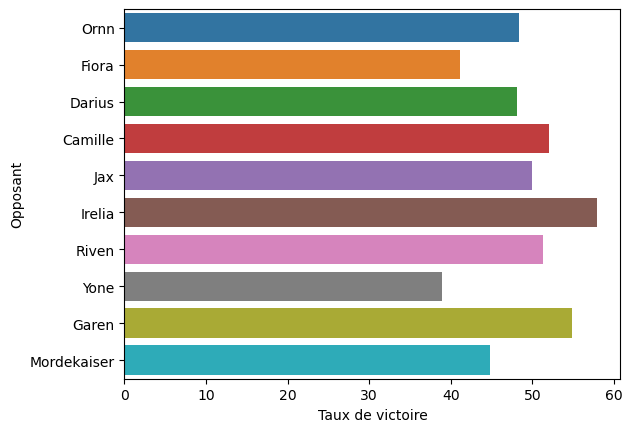

In [19]:
sns.barplot(data = df_aatrox, x = "Taux de victoire", y = "Opposant", orient = "h")

### Le DataFrame qui montre combien de fois un champion à été joué a chaque rôle

In [11]:
pd.DataFrame(np.transpose(compteur), index = champ_list, columns = df_oct.columns[0:10])

,Blue Top,Blue Jungle,Blue Mid,Blue Carry,Blue Support,Red Top,Red Jungle,Red Mid,Red Carry,Red Support
Nilah,1.0,0.0,1.0,92.0,0.0,1.0,0.0,3.0,84.0,0.0
Renata,2.0,0.0,0.0,1.0,276.0,0.0,0.0,0.0,2.0,287.0
Belveth,3.0,231.0,2.0,0.0,7.0,5.0,232.0,3.0,0.0,1.0
Aatrox,476.0,2.0,23.0,0.0,0.0,446.0,3.0,21.0,0.0,2.0
Ahri,5.0,0.0,229.0,0.0,2.0,1.0,0.0,214.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...
Ziggs,0.0,0.0,70.0,41.0,6.0,0.0,0.0,67.0,34.0,4.0
Zilean,9.0,0.0,28.0,0.0,169.0,2.0,0.0,40.0,2.0,159.0
Zoe,0.0,0.0,84.0,0.0,13.0,2.0,1.0,103.0,1.0,14.0
Zyra,1.0,1.0,4.0,4.0,87.0,1.0,0.0,6.0,7.0,91.0
